In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import utils
import signalgo

# pyplot의 기본 사이즈를 변경합니다.
plt.rcParams['figure.figsize'] = [16, 8]

In [10]:
fsr = utils.get_fsr('./sample/fsr.csv')
fsr = fsr[ ['timestamp', 'sensor_sum'] ]
fsr

,timestamp,sensor_sum
0,1.637047e+09,39476
1,1.637047e+09,39620
2,1.637047e+09,39644
3,1.637047e+09,39556
4,1.637047e+09,39672
...,...,...
21364,1.637047e+09,48760
21365,1.637047e+09,48732
21366,1.637047e+09,48868
21367,1.637047e+09,48816


Respiratory Rate (brpm) = 13.289


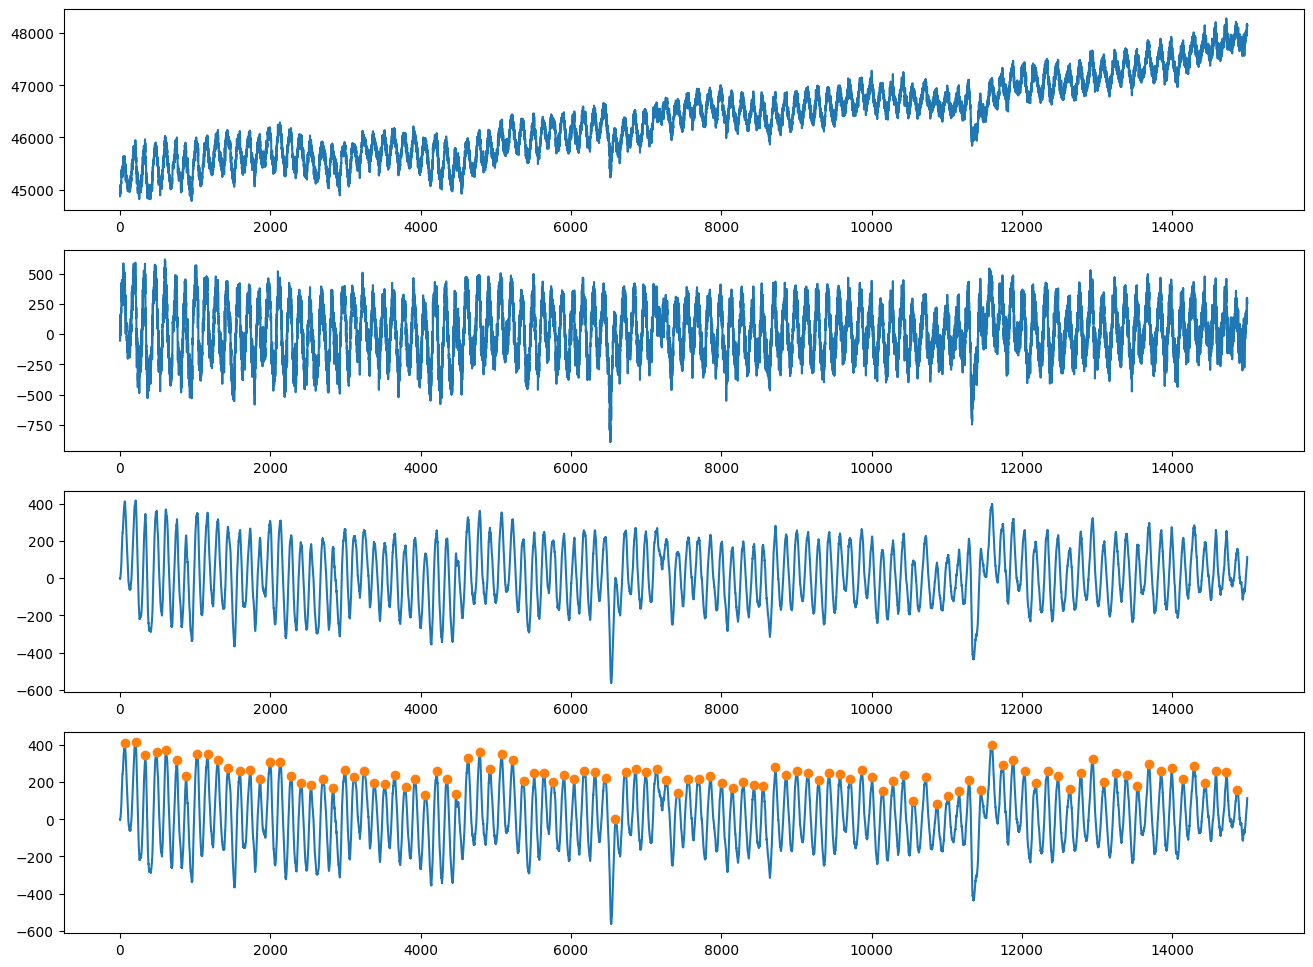

In [11]:
# Time Domain Analysis

i0, i1 = 5000, 20000

timestamp = fsr['timestamp'].to_numpy()[i0:i1]
sig1 = fsr['sensor_sum'].to_numpy()[i0:i1]
sig2 = signalgo.subtract_ema(sig1, 0.01)
sig3 = signalgo.ema(sig2, 0.05)
peaks = signalgo.get_peaks(sig3)

plt.figure(figsize=(16, 12))
plt.subplot(4,1,1)
plt.plot(sig1)
plt.subplot(4,1,2)
plt.plot(sig2)
plt.subplot(4,1,3)
plt.plot(sig3)
plt.subplot(4,1,4)
plt.plot(sig3)
plt.plot(peaks, sig3[peaks], 'o')

t = timestamp[peaks]
f = (len(t) - 1) / (t[-1] - t[0])
print('Respiratory Rate (brpm) = %.3f'%(f*60))

2.1019089541668032
Max Frequency (Hz) = 0.10663684760806248
Respiratory Rate (brpm) = 6.398


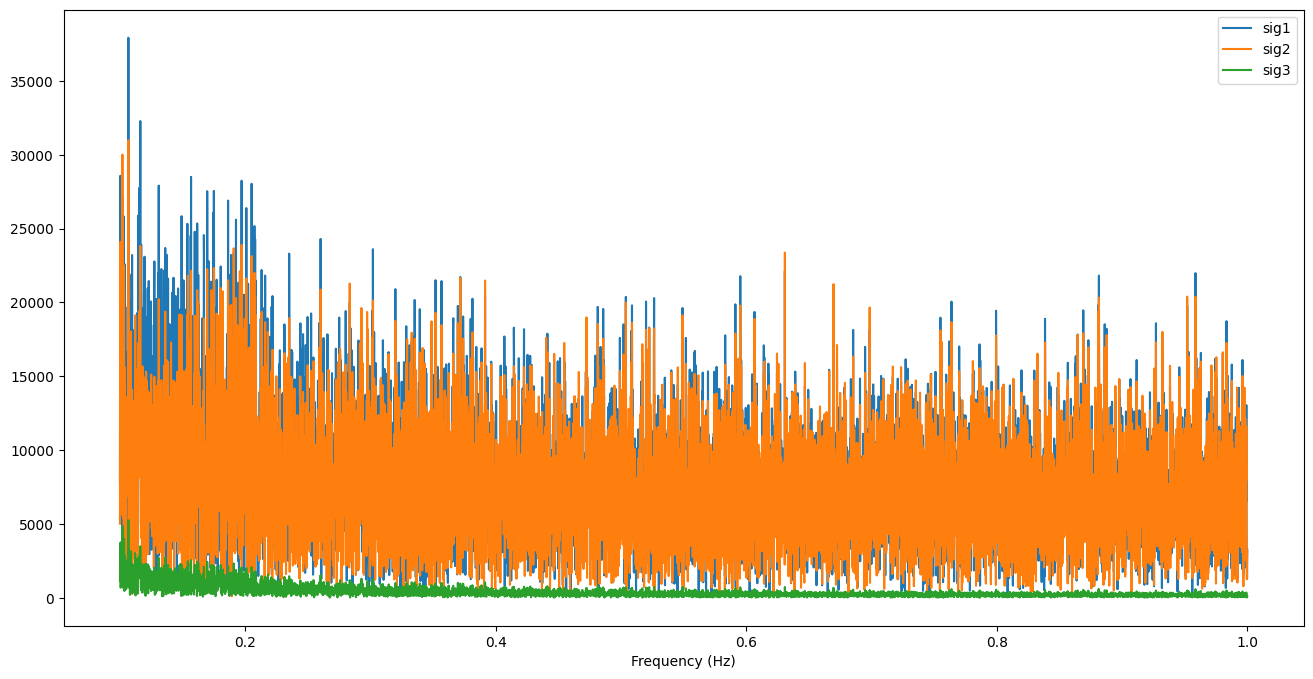

In [17]:
# Frequency Domain Analysis

# fs = 30 # sampling frequency
fs = 1 / (timestamp[-1] - timestamp[0]) * 1000
print(fs)
freq, value = signalgo.fft(sig1, fs, [0.1, 1])
plt.plot(freq, value, label='sig1')
plt.xlabel('Frequency (Hz)')
freq, value = signalgo.fft(sig2, fs, [0.1, 1])
plt.plot(freq, value, label='sig2')
plt.xlabel('Frequency (Hz)')
freq, value = signalgo.fft(sig3, fs, [0.1, 1])
plt.plot(freq, value, label='sig3')
plt.xlabel('Frequency (Hz)')
plt.legend()

max_frequency = signalgo.get_max_frequency(sig3, fs, [0.1, 0.5]) # [0.1, 1]
print('Max Frequency (Hz) =', max_frequency)
print('Respiratory Rate (brpm) = %.3f' % (max_frequency*60))
